
## Laboratory of Computational Physics mod. B  <em>at Phisics of Data, University of Padova<em>

# Title????

### Authors:
- Valeria Fioroni (University of Padova)
- Matteo Guida (University of Padova)
- Philipp Zehetner (Ludwig Maximilian University of Munich)

In [1]:
import os, glob
import time
import seaborn as sn
import numpy as np
import pandas as pd
import itertools
import time
!pip install xgboost
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
from root_pandas import read_root
#import tensorflow as tf
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy import interp
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from random import seed
from random import randint

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

Welcome to JupyROOT 6.16/00


/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.4 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)
Using TensorFlow backend.


In [2]:
from sklearn.preprocessing import FunctionTransformer

## Useful lists of variables

In [3]:
# Several branches organized in categories

General = ['exp_no', 'run_no', 'evt_no', 'nCands', 'iCand']
Masses = ['B0_M', 'B0_ErrM', 'B0_SigM', 'B0_K_S0_M', 'B0_K_S0_ErrM', 'B0_K_S0_SigM', 'B0_etap_M', 'B0_etap_ErrM', 
          'B0_etap_SigM', 'B0_etap_eta_M', 'B0_etap_eta_ErrM', 'B0_etap_eta_SigM']
Kinetics = ['B0_P', 'B0_P4', 'B0_deltae', 'B0_mbc', 'B0_etap_P', 'B0_etap_P4', 
            'B0_etap_eta_P', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P4',
            'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P4', 'B0_etap_pi0_P', 'B0_etap_pi0_P4',
            'B0_etap_pi1_P', 'B0_etap_pi1_P4', 'B0_K_S0_P', 'B0_K_S0_P4']
Other_Kinetics = ['B0_deltae', 'B0_mbc']
Kinetics_Training = ['B0_P', 'B0_deltae', 'B0_mbc', 'B0_etap_P',   'B0_etap_eta_P', 'B0_etap_eta_gamma0_P',
            'B0_etap_eta_gamma1_P', 'B0_etap_pi0_P', 'B0_etap_pi1_P', 'B0_K_S0_P']
Kinetics_comp = ['B0_P', 'B0_P40', 'B0_P41', 'B0_P42', 'B0_P43', 'B0_deltae', 'B0_mbc',
                 'B0_etap_P', 'B0_etap_P40', 'B0_etap_P41', 'B0_etap_P42','B0_etap_P43','B0_etap_eta_P',
                 'B0_etap_eta_P40', 'B0_etap_eta_P41', 'B0_etap_eta_P42', 'B0_etap_eta_P43',
                 'B0_etap_eta_gamma0_P', 'B0_etap_eta_gamma0_P40', 'B0_etap_eta_gamma0_P41', 
                 'B0_etap_eta_gamma0_P42', 'B0_etap_eta_gamma0_P43', 'B0_etap_eta_gamma1_P', 'B0_etap_eta_gamma1_P40',
                 'B0_etap_eta_gamma1_P41', 'B0_etap_eta_gamma1_P42', 'B0_etap_eta_gamma1_P43', 'B0_etap_pi0_P',
                 'B0_etap_pi0_P40', 'B0_etap_pi0_P41', 'B0_etap_pi0_P42', 'B0_etap_pi0_P43', 'B0_etap_pi1_P',
                 'B0_etap_pi1_P40', 'B0_etap_pi1_P41', 'B0_etap_pi1_P42', 'B0_etap_pi1_P43', 'B0_K_S0_P',
                 'B0_K_S0_P40', 'B0_K_S0_P41', 'B0_K_S0_P42', 'B0_K_S0_P43']
FourMomenta = ['B0_P4', 'B0_etap_P4', 'B0_etap_eta_P4', 'B0_etap_eta_gamma0_P4', 'B0_etap_eta_gamma1_P4', 
            'B0_etap_pi0_P4', 'B0_etap_pi1_P4', 'B0_K_S0_P4']
DecayAngles = ['B0_decayAngle__bo0__bc', 'B0_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo0__bc',
               'B0_etap_decayAngle__bo1__bc', 'B0_etap_decayAngle__bo2__bc']
Positions = ['B0_X', 'B0_ErrX', 'B0_Y', 'B0_ErrY', 'B0_Z', 'B0_ErrZ', 'B0_Rho',  
             'B0_etap_X', 'B0_etap_ErrX', 'B0_etap_Y', 'B0_etap_ErrY', 
             'B0_etap_Z', 'B0_etap_ErrZ', 'B0_etap_Rho',
             'B0_etap_eta_X', 'B0_etap_eta_ErrX', 'B0_etap_eta_Y',
             'B0_etap_eta_ErrY', 'B0_etap_eta_Z', 'B0_etap_eta_ErrZ', 'B0_etap_eta_Rho',
             'B0_etap_pi0_X', 'B0_etap_pi0_ErrX', 'B0_etap_pi0_Y', 'B0_etap_pi0_ErrY', 
             'B0_etap_pi0_Z', 'B0_etap_pi0_ErrZ', 'B0_etap_pi0_Rho', 
             'B0_etap_pi1_X', 'B0_etap_pi1_ErrX', 'B0_etap_pi1_Y', 'B0_etap_pi1_ErrY', 
             'B0_etap_pi1_Z', 'B0_etap_pi1_ErrZ', 'B0_etap_pi1_Rho', 
             'B0_K_S0_X', 'B0_K_S0_ErrX', 'B0_K_S0_Y', 'B0_K_S0_ErrY', 'B0_K_S0_Z',
             'B0_K_S0_ErrZ', 'B0_K_S0_Rho', 
             'B0_cosAngleBetweenMomentumAndVertexVector', 'B0_distance', 'B0_significanceOfDistance',
             'B0_dr', 'B0_etap_pi0_dr', 'B0_etap_pi1_dr', 'B0_K_S0_dr']
Vertex = ['B0_VtxPvalue', 'B0_VtxProd', 'B0_VtxProdCov', 'B0_etap_VtxPvalue', 'B0_etap_VtxProd', 'B0_etap_VtxProdCov',
          'B0_etap_eta_VtxPvalue', 'B0_etap_eta_VtxProd', 'B0_etap_VtxProdCov', 
          'B0_etap_pi0_VtxPvalue', 'B0_etap_pi0_VtxProd', 'B0_etap_pi0_VtxProdCov', 
          'B0_etap_pi1_VtxPvalue', 'B0_etap_pi1_VtxProd', 'B0_etap_pi1_VtxProdCov', 
          'B0_K_S0_VtxPvalue', 'B0_K_S0_VtxProd', 'B0_K_S0_VtxProdCov']
Vertex_Training = ['B0_VtxPvalue', 'B0_etap_VtxPvalue', 'B0_etap_eta_VtxPvalue', 'B0_etap_pi0_VtxPvalue',
                   'B0_etap_pi1_VtxPvalue', 'B0_K_S0_VtxPvalue', ]
Continuum_Suppression = ['B0_CSMVA', 'B0_TrCSMVA']
Continuum_Suppression_Training = ['B0_TrCSMVA']


Important_variables = Masses + Kinetics + DecayAngles + Positions + Vertex + Continuum_Suppression
#Training = Masses + Kinetics_Training + DecayAngles + Positions + Vertex_Training + Continuum_Suppression_Training

## Read Data

In [4]:
%%time
def memory(df):
    print(str((round(df.memory_usage(deep=True).sum() / 1024 ** 2, 2))),"Mb")
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
#Read background and signal samples from ROOT files
#BACKGROUND
path = '/home/Students/DataBelle2_all/'
SFiles = glob.glob(os.path.join(path, 'Signal/*.root'))
CFiles = glob.glob(os.path.join(path, 'Background/Continuum/*.root'))
PFiles = glob.glob(os.path.join(path, 'Background/Peaking/*.root'))

Full_Signal = pd.concat((read_root(f, 'B0') for f in SFiles))
Full_Continuous = pd.concat((read_root(f, 'B0') for f in CFiles)) 
Full_Peaking = pd.concat((read_root(f, 'B0') for f in PFiles))

#Signal: require B0_isSignal == True
Full_Signal=Full_Signal[Full_Signal['B0_isSignal']== True]
#reset row indexing
Full_Signal.reset_index(drop=True, inplace=True)
print(Full_Signal.shape)

#Continuum: require B0_isContinuumEvent == True
Full_Continuous=Full_Continuous[Full_Continuous['B0_isContinuumEvent']== True]
#reset row indexing
Full_Continuous.reset_index(drop=True, inplace=True)
print(Full_Continuous.shape)

#Peaking: require B0_isNotContinuumEvent == True
Full_Peaking.reset_index(drop=True, inplace=True)
print(Full_Peaking.shape)
    
memory(Full_Signal)
memory(Full_Continuous)
memory(Full_Peaking)

/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/root_pandas/readwrite.py:320: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(columns, axis=1, copy=False)


(219897, 391)
(232554, 391)
(1490, 391)
1145.02 Mb
1210.92 Mb
7.76 Mb
CPU times: user 2min 25s, sys: 6.53 s, total: 2min 32s
Wall time: 2min 31s


In [5]:
Branches = []
MC_Branches = []
Data_Branches = []
Kinetics_CMS = []
MC_Keywords = ['True', 'Truth', 'isRight', 'isSignal', 'isContinuum', 
               'isNotContinuum', 'MC', 'mc']

# Deciding which branches are MonteCarlo and which are not
for Branch in Full_Signal.columns : 
    MC = False 
    Branches.append(Branch)
    for key in MC_Keywords : 
        if key in Branch :  MC = True
    if MC==True : MC_Branches.append(Branch)
    else :  Data_Branches.append(Branch)

# All Data Branches excluding the unphysical ones (such as evt_no, etc)
Data_Branches = [b for b in Data_Branches if not b in General]
Arrays = []
for Branch in Data_Branches : 
    #print(type(Full_Signal[Branch][0]))
    if (type(Full_Signal[Branch][0]) is np.ndarray) : Arrays.append(Branch)
Data_Branches = [b for b in Data_Branches if not b in Arrays]

# Finding the CMS Kinetics
for Branch in Data_Branches : 
    if 'cms' in Branch : Kinetics_CMS.append(Branch)

for Branch in Data_Branches: 
    #print (Branch)
    pass
    
print (Kinetics_CMS)
Important_variables = Kinetics_CMS + Masses + Other_Kinetics + Continuum_Suppression_Training + Positions + DecayAngles + Vertex_Training

['B0_Pcms', 'B0_etap_Pcms', 'B0_etap_eta_Pcms', 'B0_etap_eta_gamma0_Pcms', 'B0_etap_eta_gamma1_Pcms', 'B0_etap_pi0_Pcms', 'B0_etap_pi1_Pcms', 'B0_K_S0_Pcms']


## Preselection

In [6]:
#Masses from PDG
M_B0 = [5.27955, 0.00026]
M_K0 = [0.497611, 0.000013]
M_etap = [0.95778, 0.00006]
M_eta = [0.547862, 0.000017]

#Require the B0 mass to be within 5 sigma from PDG value
Full_Signal = Full_Signal[abs(Full_Signal['B0_M'] - M_B0[0]) < 5 * Full_Signal['B0_ErrM']]
print(Full_Signal.shape)

Full_Continuous = Full_Continuous[abs(Full_Continuous['B0_M'] - M_B0[0]) < 5 * Full_Continuous['B0_ErrM']]
print(Full_Continuous.shape)

Full_Peaking = Full_Peaking[abs(Full_Peaking['B0_M'] - M_B0[0]) < 5 * Full_Peaking['B0_ErrM']]
print(Full_Peaking.shape)

#Signal: In case of more than 1 candidate per event select the first one occuring
Mask_duplicated = Full_Signal.duplicated(subset='evt_no', keep='first')
Mask_duplicated=np.logical_not(Mask_duplicated)
Full_Signal=Full_Signal[Mask_duplicated]
Full_Signal.reset_index(drop=True, inplace=True)

print(Full_Signal.shape)
print(Full_Signal['evt_no'].nunique())

(213579, 391)
(120103, 391)
(933, 391)
(212354, 391)
212354


In [7]:
Full_Signal = Full_Signal[Important_variables]
Full_Continuous = Full_Continuous[Important_variables]
Full_Peaking = Full_Peaking[Important_variables]

In [8]:
"""#Select variables useful for the Classification task
Signal_sel = Full_Signal[Important_variables]
del(Full_Signal)

Full_Continuous= Full_Continuous[Important_variables]
del(Full_Continuous)

Full_Peaking= Full_Peaking[Important_variables]
del(Full_Peaking)

#drop 4-momenta: not really useful for classification
Signal_sel =Signal_sel.drop(FourMomenta, axis=1)
Continuum_bkg_sel=Continuum_bkg_sel.drop(FourMomenta, axis=1)
Peaking_bkg_sel= Peaking_bkg_sel.drop(FourMomenta, axis=1)

print(Continuum_bkg_sel.shape)
print(Peaking_bkg_sel.shape)
print(Signal_sel.shape)"""

'#Select variables useful for the Classification task\nSignal_sel = Full_Signal[Important_variables]\ndel(Full_Signal)\n\nFull_Continuous= Full_Continuous[Important_variables]\ndel(Full_Continuous)\n\nFull_Peaking= Full_Peaking[Important_variables]\ndel(Full_Peaking)\n\n#drop 4-momenta: not really useful for classification\nSignal_sel =Signal_sel.drop(FourMomenta, axis=1)\nContinuum_bkg_sel=Continuum_bkg_sel.drop(FourMomenta, axis=1)\nPeaking_bkg_sel= Peaking_bkg_sel.drop(FourMomenta, axis=1)\n\nprint(Continuum_bkg_sel.shape)\nprint(Peaking_bkg_sel.shape)\nprint(Signal_sel.shape)'

In [9]:
"""#The Dataframe contains arrays as elements, I create a new column for each component
for M in FourMomenta: 
    Full_Signal[M+'0'], Full_Signal[M+'1'], Full_Signal[M+'2'], Full_Signal[M+'3'] = zip(*Full_Signal.pop(M))
for M in FourMomenta: 
    Full_Peaking[M+'0'], Full_Peaking[M+'1'], Full_Peaking[M+'2'], Full_Peaking[M+'3'] = zip(*Full_Peaking.pop(M))
for M in FourMomenta: 
    Full_Continuous[M+'0'], Full_Continuous[M+'1'], Full_Continuous[M+'2'], Full_Continuous[M+'3'] = zip(*Full_Continuous.pop(M))"""

"#The Dataframe contains arrays as elements, I create a new column for each component\nfor M in FourMomenta: \n    Full_Signal[M+'0'], Full_Signal[M+'1'], Full_Signal[M+'2'], Full_Signal[M+'3'] = zip(*Full_Signal.pop(M))\nfor M in FourMomenta: \n    Full_Peaking[M+'0'], Full_Peaking[M+'1'], Full_Peaking[M+'2'], Full_Peaking[M+'3'] = zip(*Full_Peaking.pop(M))\nfor M in FourMomenta: \n    Full_Continuous[M+'0'], Full_Continuous[M+'1'], Full_Continuous[M+'2'], Full_Continuous[M+'3'] = zip(*Full_Continuous.pop(M))"

## Train, Validation and Test splitting

In [11]:
# seed random number generator
n_seed=2347
seed(n_seed)

In [12]:
Full_Signal['Type'] = 2 #Signal label == 2
Full_Peaking['Type'] = 1 # Peaking background label == 1
Full_Continuous['Type'] = 0 #Continuum backgroun label == 0
'''***********************************************************************************************************
**************************************************************************************************************
I can't think of a way of doing the following with a for loop. I don't want to create a 
list with the dataframes because it would take a lot memory...if you find an efficient way of doing the
train-validation-test splitting keeping signal and different background separated let me know and change the code,
I'll try to find a way of doing it more efficiently too
****************************************************************************************************************
****************************************************************************************'''
#SIGNAL: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Full_Signal.drop('Type',axis=1)
Y = Full_Signal['Type']
Y = label_binarize(Y, classes=[0, 1, 2]) # Binarize the labels
X_train_S, X_test_val_S, Y_train_S, Y_test_val_S = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_S
Y = Y_test_val_S
X_validation_S, X_test_S, Y_validation_S, Y_test_S = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_S)
del(Y_test_val_S)

#CONTINUUM BKG: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Full_Continuous.drop('Type',axis=1)
Y = Full_Continuous['Type']
Y = label_binarize(Y, classes=[0, 1, 2]) # Binarize the labels
X_train_C, X_test_val_C, Y_train_C, Y_test_val_C = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_C
Y = Y_test_val_C
X_validation_C, X_test_C, Y_validation_C, Y_test_C = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_C)
del(Y_test_val_C)

#PEAKING BKG: Train, Validation and test split (50%, 30%, 20%)
#Dataset divided into 50% of train data and 50% for validation and test
X = Full_Peaking.drop('Type',axis=1)
Y = Full_Peaking['Type']
Y = label_binarize(Y, classes=[0, 1, 2]) # Binarize the labels
X_train_P, X_test_val_P, Y_train_P, Y_test_val_P = train_test_split(X, Y, train_size=0.5,random_state=randint(10**6,10**9))
#validation and test set divided into 30% for validation and 20% for test
X = X_test_val_P
Y = Y_test_val_P
X_validation_P, X_test_P, Y_validation_P, Y_test_P = train_test_split(X, Y, train_size=0.6,random_state=randint(10**6,10**9))
del(X_test_val_P)
del(Y_test_val_P)

"""del(Full_Signal)
del(Full_Peaking)
del(Full_Continuous)"""

'del(Full_Signal)\ndel(Full_Peaking)\ndel(Full_Continuous)'

In [13]:
print(X_train_S.shape,"\n",X_train_C.shape,"\n",X_train_P.shape)

(106177, 83) 
 (60051, 83) 
 (466, 83)


In [65]:
#Define Training, Validation and Test datasets
X_train=pd.concat((X_train_S, X_train_C, X_train_P), axis=0)

X_validation=pd.concat((X_validation_S, X_validation_C, X_validation_P), axis=0)
X_test=pd.concat((X_test_S, X_test_C, X_test_P), axis=0)

Y_train=np.concatenate((Y_train_S, Y_train_C, Y_train_P), axis=0)
Y_validation=np.concatenate((Y_validation_S, Y_validation_C, Y_validation_P), axis=0)
Y_test=np.concatenate((Y_test_S, Y_test_C, Y_test_P), axis=0)

print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

"""print(X_train.nbytes/(1024 ** 2), "Mb")
print(X_validation.nbytes/(1024 ** 2), "Mb")
print(X_test.nbytes/(1024 ** 2), "Mb")"""
n_classes = Y_train.shape[1]


#shuffle the dataset
permutation = np.random.permutation(X_train.shape[0])
X_train = X_train.sample(frac=1)
Y_train = Y_train[permutation]

permutation = np.random.permutation(X_validation.shape[0])
X_validation = X_validation.sample(frac=1)
Y_validation = Y_validation[permutation]

permutation = np.random.permutation(X_test.shape[0])
X_test = X_test.sample(frac=1)
Y_test = Y_test[permutation]

(166694, 83)
(100017, 83)
(66679, 83)


In [16]:
"""ss = StandardScaler()
print(ss.fit(X_train))
# The averages and standard deviations of all the databases are saved, 
# now with transfer I modify the data (Train and Test) in practice
X_train = ss.transform(X_train)
X_validation = ss.transform(X_validation)
X_test = ss.transform(X_test)"""

StandardScaler(copy=True, with_mean=True, with_std=True)


## Principal Component Analysis

Total number of feature : 83
Variables needed to explain 99% of variance :  49
Reducing the size of the dataset 59.04 %


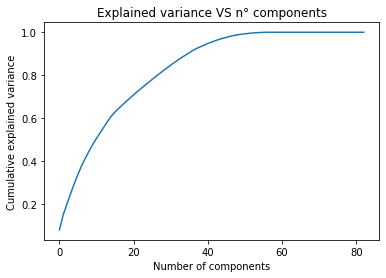

In [17]:
n_features=X_train.shape[1]
print("Total number of feature :",n_features)
pca = PCA(n_components=n_features)
pca.fit(X_train)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title("Explained variance VS n° components")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
n_components=np.where(np.cumsum(pca.explained_variance_ratio_)>0.99)[0][0]
print("Variables needed to explain 99% of variance : ", n_components)
print("Reducing the size of the dataset",(round((n_components/n_features)*100,2)),"%")

In [39]:
pca = PCA(n_components=n_components)
X_pca_train = pca.fit_transform(X_train)
X_pca_validation = pca.transform(X_validation)
X_pca_test = pca.transform(X_test)
pca_std = np.std(X_pca_train)

print(X_train.shape)
print(X_pca_train.shape)
print(Y_train.shape)

(166694, 83)
(166694, 49)
(166694, 3)


In [41]:
ss = StandardScaler()
print(ss.fit(X_pca_train))
# The averages and standard deviations of all the databases are saved, 
# now with transfer I modify the data (Train and Test) in practice
X_pca_train = ss.transform(X_pca_train)
X_pca_validation = ss.transform(X_pca_validation)
X_pca_test = ss.transform(X_pca_test)

StandardScaler(copy=True, with_mean=True, with_std=True)


## Model Optimization
# ************** DRAFT **************
in "parameters" I would like to put also different possibilities for learning rate and solver at least. Maybe just 3 different learning rates and 2 different solvers, otherwise it could take too long to run

In [42]:
%%time
"""parameters = {'hidden_layer_sizes': [(50,100,50,), (50,100,100,50,), (50, 200, 300, 400,100)],
              'solver': ['sgd', 'adam'],
              #'learning_rate_init': [0.1, 0.01, 0.001]
              'learning_rate_init': [0.1, 0.01]
             }"""
parameters = {'hidden_layer_sizes': [(50,100,100,50,)],
              'solver': ['sgd', ],
              #'learning_rate_init': [0.1, 0.01, 0.001]
              'learning_rate_init': [0.01]
             }


mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    tol=1e-4, random_state=n_seed)

clf= GridSearchCV(mlp,param_grid=parameters,verbose=2,cv=5,return_train_score=True)

clf.fit(X_pca_train, Y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
scores=pd.DataFrame(clf.cv_results_)
print(scores[['param_hidden_layer_sizes', 'param_solver', 'param_learning_rate_init', 'mean_test_score', 'mean_train_score']])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd, total= 9.3min
[CV] hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.3min remaining:    0.0s


[CV]  hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd, total= 9.4min
[CV] hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd 


/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd, total= 9.4min
[CV] hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd 


/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd, total= 9.4min
[CV] hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd 
[CV]  hidden_layer_sizes=(50, 100, 100, 50), learning_rate_init=0.01, solver=sgd, total= 9.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 46.5min finished


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 100, 100, 50), 'learning_rate_init': 0.01, 'solver': 'sgd'}
Score with best parameters:
0.5558028483328734

All scores on the grid:
  param_hidden_layer_sizes param_solver param_learning_rate_init  \
0       (50, 100, 100, 50)          sgd                     0.01   

   mean_test_score  mean_train_score  
0         0.555803          0.783043  
CPU times: user 3h 19min 38s, sys: 4h 24min 37s, total: 7h 44min 15s
Wall time: 58min 11s


/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
%%time
#get training and validation error for the best NN model from CV
best_mlp = MLPClassifier(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], max_iter=300, alpha=1e-4,
                    solver=clf.best_params_['solver'], tol=1e-4, random_state=n_seed,
                    learning_rate_init=clf.best_params_['learning_rate_init'])

best_mlp.fit(X_pca_train, Y_train)

print(best_mlp.predict_proba(X_pca_train))

training_error = 1. - best_mlp.score(X_pca_train,Y_train)
validation_error = 1. - best_mlp.score(X_pca_validation,Y_validation)

print ("***********************************************************************************************")
print ("***********************************************************************************************")
print(clf.best_params_['hidden_layer_sizes'])

print ('\nRESULTS FOR BEST NN\n')


print ("Best NN training error: %f" % training_error)
print ("Best NN validation error: %f" % validation_error)

/home/Students/anaconda3/envs/BelleAnalysis/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[4.08050602e-01 1.65911597e-04 6.00932261e-01]
 [1.38367771e-01 1.24198041e-03 8.56082932e-01]
 [3.56206421e-02 2.89125674e-05 9.60931225e-01]
 ...
 [2.23833706e-01 5.51171619e-04 7.69283305e-01]
 [2.81868758e-02 2.30365615e-03 9.68936878e-01]
 [5.50158128e-01 2.60288073e-03 4.45245545e-01]]
***********************************************************************************************
***********************************************************************************************
(50, 100, 100, 50)

RESULTS FOR BEST NN

Best NN training error: 0.247207
Best NN validation error: 0.447474
CPU times: user 39min 49s, sys: 53min 11s, total: 1h 33min
Wall time: 11min 40s


[0 0 1 ... 0 0 1]


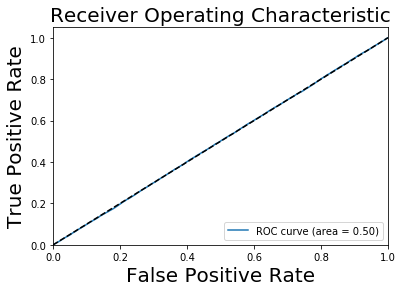

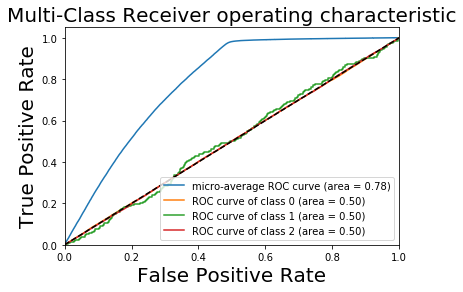

CPU times: user 2.12 s, sys: 1.84 s, total: 3.97 s
Wall time: 1.2 s


In [44]:
%%time
#code from https://scikit-learn.org/0.15/auto_examples/plot_roc.html
#from itertools import cycle

y_score = best_mlp.predict_proba(X_pca_validation)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_validation[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_validation.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(Y_validation.ravel())
# Plot of a ROC curve for a specific class
plt.figure()
fig.set_size_inches(14, 10)
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver Operating Characteristic',fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
fig.set_size_inches(14, 10)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Multi-Class Receiver operating characteristic',fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",fontsize=15)

    plt.ylabel('TRUE LABEL',fontsize=20)
    plt.xlabel('PREDICTED LABEL',fontsize=20)
    fig.set_size_inches(14, 10)
    plt.tight_layout()

In [49]:
%%time
from sklearn.metrics import confusion_matrix
Y_train_predict = best_mlp.predict_proba(X_pca_train)
Y_test_predict = best_mlp.predict_proba(X_pca_test)
Y_test_single_col=np.where(Y_test==1)[1]
Y_test_mo=pd.get_dummies(Y_test_single_col[:])
Y_test_predict_mo=Y_test_predict.round()
cnf_matrix = confusion_matrix(Y_test_mo.values.argmax(axis=1), Y_test_predict_mo.argmax(axis=1))

CPU times: user 2.8 s, sys: 2.48 s, total: 5.29 s
Wall time: 827 ms


Normalized confusion matrix
[[0.29382624 0.         0.70617376]
 [0.28342246 0.         0.71657754]
 [0.28935038 0.         0.71064962]]


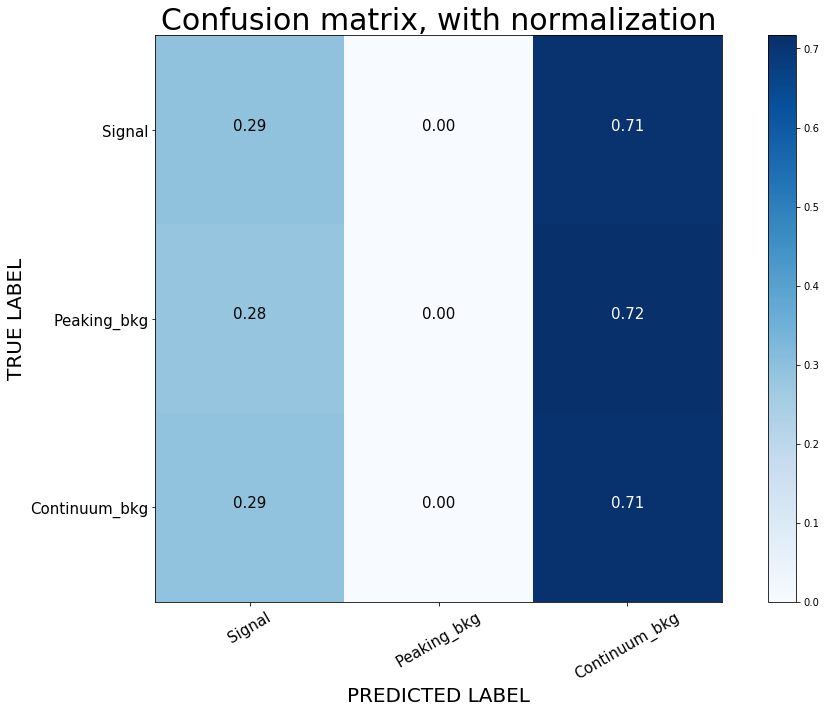

In [50]:
plot_confusion_matrix(cnf_matrix, classes=['Signal', 'Peaking_bkg', 'Continuum_bkg'],title='Confusion matrix, with normalization')

## XGBOOST

In [51]:
Y_train_single_col=np.where(Y_train==1)[1]

## Feature importance Xgboost with original variable 

In [68]:
%%time
# For next cell
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

print("Training on %i examples with %i features"%X_train.shape)

#Use default parameters and train on full dataset
XGBclassifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=1000,n_jobs = 1,objective = 'multi:softmax',silent=1,tree_method='approx')
#Train and time classifier
XGBclassifier.fit(X_train, Y_train_single_col)

#Make Predictions
print("Predicting on %i examples with %i features\n"%X_test.shape)
y_pred= XGBclassifier.predict(X_test)

#Print Results
print("Model Accuracy with all features: {:.2f}%".format(100*XGBclassifier.score(X_test, Y_test_single_col)))

Training on 166694 examples with 83 features
Predicting on 66679 examples with 83 features

Model Accuracy with all features: 63.63%
CPU times: user 1h 14min 1s, sys: 0 ns, total: 1h 14min 1s
Wall time: 10min 4s


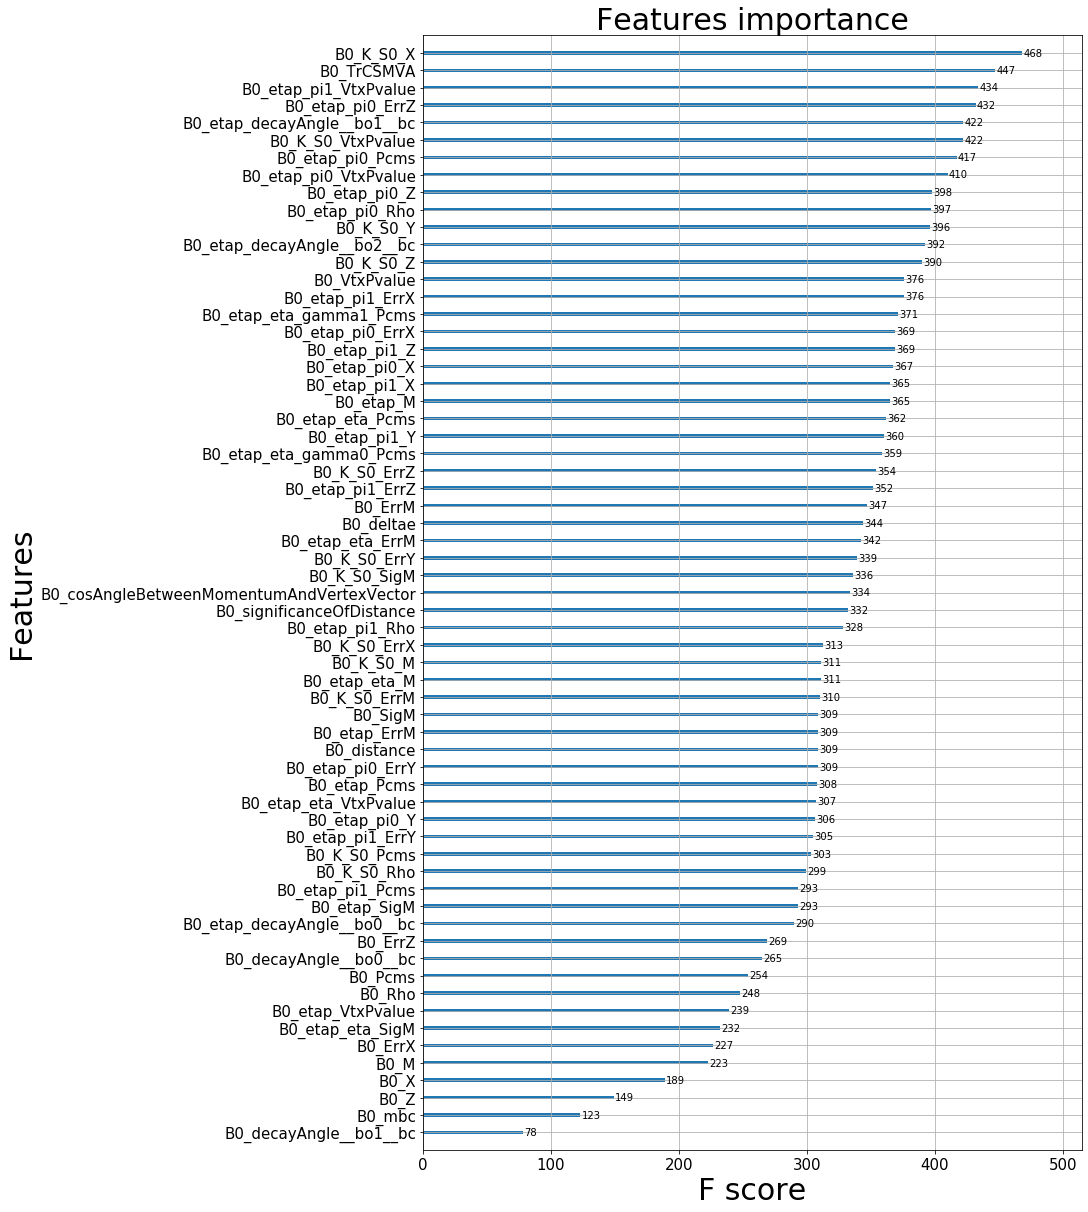

In [69]:
fig=plt.figure()
fig.set_size_inches(30.5, 20.5)
plt.tick_params(labelsize=15)
xgb.plot_importance(XGBclassifier, ax=plt.gca())
plt.title("Features importance",fontsize=30)
plt.ylabel("Features",fontsize=30)
plt.xlabel("F score",fontsize=30)
fig.subplots_adjust(left=0.6)  #
#fig.savefig('SUSYXGBoost1.pdf')

## Feature importance Xgboost with PCA variable 
Only for the result obviously for feature importance does not make much sense. 
I think this section will be deleted.

In [70]:
%%time
# For next cell
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

print("Training on %i examples with %i features"%X_pca_train.shape)

#Use default parameters and train on full dataset
XGBclassifier = xgb.sklearn.XGBClassifier(nthread=-1, seed=1, n_estimators=1000,n_jobs = 1,objective = 'multi:softmax',silent=1,tree_method='approx')
#Train and time classifier
XGBclassifier.fit(X_pca_train, Y_train_single_col)

#Make Predictions
print("Predicting on %i examples with %i features\n"%X_pca_test.shape)
y_pred= XGBclassifier.predict(X_pca_test)

#Print Results
print("Model Accuracy with all features: {:.2f}%".format(100*XGBclassifier.score(X_pca_test, Y_test_single_col)))

Training on 166694 examples with 49 features
Predicting on 66679 examples with 49 features

Model Accuracy with all features: 63.63%
CPU times: user 42min 27s, sys: 0 ns, total: 42min 27s
Wall time: 5min 29s


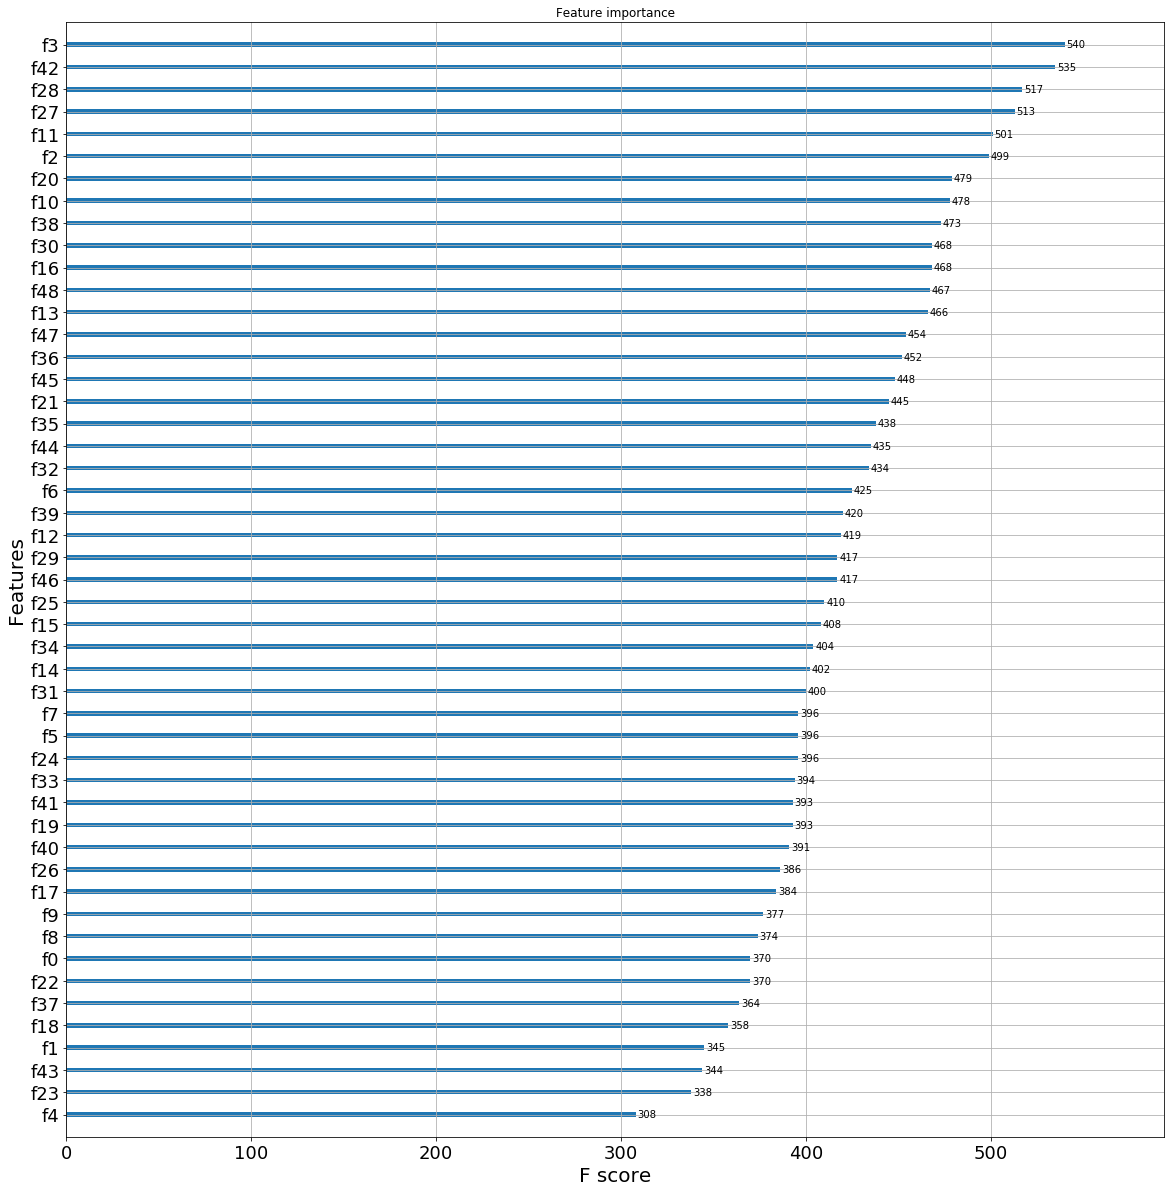

In [71]:
fig=plt.figure()
fig.set_size_inches(30.5, 20.5)
plt.ylabel("Features",fontsize=20)
plt.xlabel("F score",fontsize=20)
plt.tick_params(labelsize=18)
xgb.plot_importance(XGBclassifier, ax=plt.gca())
fig.subplots_adjust(left=0.4)  #
#fig.savefig('SUSYXGBoost1.pdf')